In [1]:


version()
%display latex

In [2]:
from kerrgeodesic_gw import (KerrBH,h_plus_particle, h_cross_particle, 
                             h_amplitude_particle_fourier, plot_spectrum_particle, 
                             plot_h_particle, h_particle_signal)
from kerrgeodesic_gw import (lisa_detector)

In [3]:
def r_isco(a):
    return KerrBH(a).isco_radius()

def ordital_period(a, r0):
    return RDF(2*pi*(r0^(3/2) + a))

In [4]:
# 

In [5]:
phi1 = 0
a = 0
r0 = 0.15000 + r_isco(a) 
tmax = 1 * ordital_period(a, r0) 
theta1=pi/2
phi1=0
print("tmax = ", r0)

tmax =  6.15000000000000


In [6]:
import scipy.constants as constants
from sage.symbolic.constants import pi
import matplotlib.pyplot as plt

def file_amplitude(a, r0, theta1, phi1,fn):
    k = h_particle_signal(a, r0, theta1, phi1, 0, 100, mode='+',
                          nb_points=201, phi0=0, l_max=10, m_min=1,
                          approximation=None, store=None)
    
    time = [row[0] for row in k]
    amplitude = [row[1] for row in k]
    
    # Fundamental constants in SI units
    c = constants.c
    G = constants.G
    dist1 = 0.000008277 * 3.085677581e25
    mu = 5e-2 * 1.98847e30
    
    A = [amp * G * mu / (c**2 * dist1) for amp in amplitude]
    
    file1 = []
# created file name should be time_and_h_+ theta .txt
    with open('time_and_h_' + str(fn) + '.txt', 'w+') as file:
        for i in range(len(time)):
            file.write(str(time[i]) + " " + str(A[i]) + "\n")
            file1.append([time[i], A[i]])
    


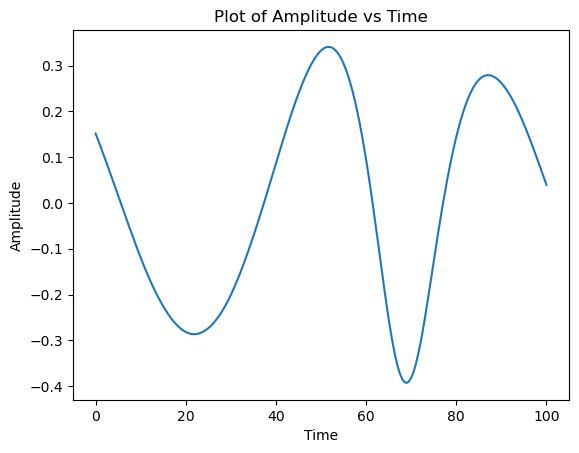

201


In [7]:
import matplotlib.pyplot as plt
# figure=p58icle(a, r0, theta1, phi1, 0, 200, l_max=10, m_min=1, approximation=None)
# figure.show()
theta1 = pi/2  # Initialize theta1 as a numeric value
k=h_particle_signal(a, r0, theta1, phi1, 0,100,  mode='+',
                      nb_points=201, phi0=0, l_max=10, m_min=1,
                      approximation=None, store=None)
#K is a 2d list  with fist col as time and second col as amplitude. plot one  against the other

# Assuming K is the 2D list with first column as time and second column as amplitude
time = [row[0] for row in k]
amplitude = [row[1] for row in k]
# A = 3*10^(8*)
# plot upto 120 index 

plt.plot(time, amplitude)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Plot of Amplitude vs Time')
plt.show()

# find  size of list amplitude.
print(len(amplitude))




In [8]:
import scipy.constants as constants
from sage.symbolic.constants import pi
import matplotlib.pyplot as plt

# Fundamental constants in SI units
c = constants.c
G = constants.G
dist1 = 0.000008277* 3.085677581e25
mu = 5e-2 *1.98847e30

time = [row[0] for row in k]
amplitude = [row[1] for row in k]

# Assuming you have defined time, amplitude, and dis appropriately
A = [amp * G * mu  / (c**2 * dist1) for amp in amplitude]


file1=[]

with open('time_and_h.txt', 'w+') as file:
# write time and a in the file1
    for i in range(len(time)):
        file.write(str(time[i]) + " " + str(A[i]) + "\n")
        file1.append([time[i], A[i]])

In [9]:

theta1=pi/4

file_amplitude(a, r0, theta1, phi1, 4)


In [10]:
from kerrgeodesic_gw import lisa_detector as ld
import numpy as np

frequencies = np.logspace(-5, 0, 1000)
# crate a loop to find psd for each frequency in frequencies
# MAKE PSD A LIST NOT AN ARRAY WITH  LOOP
psd = [ld.power_spectral_density (f) for f in frequencies]
# EXPORT THIS TO A FILE WITH FREQUENCY AND PSD IN TWO COLUMNS
with open('psd.txt', 'w+') as file:
    for i in range(len(frequencies)):
        file.write(str(frequencies[i]) + " " + str(psd[i]) + "\n")
        
    


In [21]:
# frequency list 10-5 to 1 with 1000 points
frequencies = np.logspace(-5, 0, 1000)
def strain_sensitivity(f):

    # empty np array
    f = np.array([])
    for i in range(len(frequencies)):
        f=lisa_detector.strain_sensitivity(frequencies[i]))
    return f

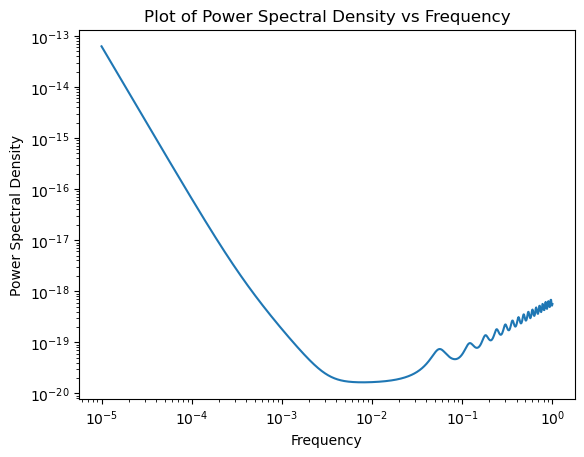

In [24]:
plt.figure()
plt.loglog( frequencies, f)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Plot of Power Spectral Density vs Frequency')
plt.show()

